<font size="6"><b><i>Brian2</i> Simulation of Calcium Based Plasticity in a Spiking Model</font>

                                                                           Hanyu Li
                                                                           03/25/2016

In [1]:
import sys
sys.path.append("../")
from IPython.display import display, Math, Latex

# Background and Previous Work

## 1. Calcium Plasticity in Spiking Model

synaptic efficacy changes induced by calcium


<font size="4"><b>Calcium Based Plasticity Rule Described by Grauper-Brunel Model(Grauper et.al, 2012):</b> 

\begin{equation}
\tau \frac{d\rho}{dt} = -\rho (1-\rho)(\rho_*- \rho)
        + \gamma_p (1-\rho)\Theta[c(t)-\theta_p]
        - \gamma_d \rho \Theta[c(t)-\theta_d] + Noise(t)
\end{equation}



<div style="align: left; text-align:center;">
<img src="pictures/calcium_dynamics1.png">
<div class="caption">Fig.1 Order of Pre-Post Spike Pair causes potentiation or depression 
</div>

<br>
<br>

<b>Variation in Higgins(2014)</b>

\begin{equation}
\tau \frac{d\rho}{dt} = -\frac{\partial U(\rho)} {\partial \rho}
        - \gamma_d \rho \Theta[c(t)-\theta_d] 
        + \gamma_p (1-\rho)\Theta[c(t)-\theta_p]
        + \sigma \sqrt{\tau} \sqrt{\Theta(t)[c(t) - \theta_D] + \Theta[c(t)-\theta_P]} \eta(t)
\end{equation}

in which

$U(\rho) = \frac{1}{4} \rho^2 (1-\rho)^2, \ \eta(t)\ is\ Gaussian\ noise$
<div style="align: left; text-align:center;">
<img src="pictures/calcium_dynamics2.png", height=350, width=500>
<div class="caption">Fig.2 Pre-Post Spike Train and Synaptic Efficacy Changes 
</div>

## 2. Rate Model Plasticity and Change in Firing Rate Distribution 

<font size="4"><b>Rate Model and Learning Rule inference in Sukbin et.al, 2016:</b> 

\begin{equation}
\tau_E  \frac{dr_i^E}{dt} = - r_i^E + 
    \Phi_E ( \sum_{j=1}^{N_E} W_{ij}^{EE} r_j^E - \sum_{j=1}^{N_I} W_{ij}^{EI} r_j^I + I_i^{EX})
\end{equation}

\begin{equation}
\tau_I  \frac{dr_i^I}{dt} = - r_i^I + \Phi_I ( \sum_{j=1}^{N_E} W_{ij}^{IE} r_j^E + I_i^{EX})
\end{equation}

in which $\Phi$ is the f-I transfer function

Plasticity obeys 

Plasticity is described by:

\begin{equation}
\Delta W_{ij}^{EE} \leftarrow \Delta W_{ij}^{EE} - \frac{1}{N_E} \sum_{j=1}{N_E}\Delta W_{ij}^{EE}
\end{equation}

Familiar inputs 
<div style="align: left; text-align:center;">
<img src="pictures/sukbin2.png", height=350, width=500>
<div class="caption">Fig.3 Comparison between simulated and experimental data 
</div>


<br>
<br>
Familiar inputs 
<div style="align: left; text-align:center;">
<img src="pictures/sukbin1.png", height=350, width=500>
<div class="caption">Fig.4 Comparison between simulated and experimental data 
</div>


# Introduction

Aim: Show the effect Calcium Plasticity in a spiking neural network to reproduce the effect of learning on 

A E-I network with 4:1 ratio, probability of connection = 0.05

In [2]:
from d3js_network import show_network
%cd ~/pypath/calcium-spike-model/notebooks/
show_network(template='connectivity_E_200_I_50.template',
            connectivity='connectivity_E_200_I_50.json',  w=900,h=800)
#show_network(template='connectivity_E_500_I_125.template',
#            connectivity='connectivity_E_500_I_125.json',  w=900,h=900)

/home/hanyu/pypath/calcium-spike-model/notebooks


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 99999;

<IPython.core.display.Javascript object>

# Simulation

In [4]:
from brian_utils import *
from brian_simulator import *
%matplotlib inline
%cd ~/pypath/calcium-spike-model/

/home/hanyu/pypath/calcium-spike-model


In [5]:
params = {
    'cpre_0':0.1,
    'cpost_0':0.1,
    'rho_0':0.5,
    'c':0.2,
    'dummy':0.2,
    'Ipre':0,
    'Ipost':0,
    'w0':0.5,
    'w_EE':0.2,
    'w_IE':0.1,
    'w_II':-0.4,
    'w_EI':-0.4,
    #LIF specific constants,
    'tau_lif':26, #*ms
    'V_init':-60,
    'V_rest':-70,
    'V_reset':-70,
    'V_threshold':-50,
    'CM':0.001,
    'RM':20.0,
    'refrac':0,
    #Synapse model specific constants,
    'rho_init':0.019,
    'ca_initial':0,
    'ca_delay':4.61, #ms
    'Cpre':0.56175,
    'Cpost':1.23964,
    'eta':0,
    'tau_ca':22.6936,
    'theta_D':1,
    'theta_P':1.3,
    'gamma_D':331.909,
    'gamma_P':725.085,
    'taurho':346361, #*ms
    'taurho_fast':10, #*ms # dummy,
    'taupre':22,
    'taupost':22,
    'tau_ca':22, #*ms
    'rho_star':0.5,
    'D':4.6098,
    'baseline_I_ext_E':15,
    'baseline_I_ext_I':35,
    'mean_I_ext_E':21,
    'mean_I_ext_I':50,
    'sigma':20,
    'familiar_individual_sigma':5.3}

<b> Initialize Brian Parameters, mostly adapted from Higgins(2014)</b>
<img src="../notebooks/pictures/params.png", height=400, width=400>

WARNING  brian2.synapses.synapses.no_synapses: Synapses object 'synapses_7' does not have any synapses. Did you forget a 'connect'?


Starting simulation for duration 8. s
106.6 ms (1%) simulated in 1s, estimated 1m 14s remaining.
213.2 ms (2%) simulated in 2s, estimated 1m 13s remaining.
0.32 s (4%) simulated in 3s, estimated 1m 12s remaining.
0.4279 s (5%) simulated in 4s, estimated 1m 11s remaining.
0.5351 s (6%) simulated in 5s, estimated 1m 10s remaining.
0.6419 s (8%) simulated in 6s, estimated 1m 9s remaining.
0.7487 s (9%) simulated in 7s, estimated 1m 8s remaining.
0.8562 s (10%) simulated in 8s, estimated 1m 7s remaining.
0.9628 s (12%) simulated in 9s, estimated 1m 6s remaining.
1.0701 s (13%) simulated in 10s, estimated 1m 5s remaining.
1.1765 s (14%) simulated in 11s, estimated 1m 4s remaining.
1.2831 s (16%) simulated in 12s, estimated 1m 3s remaining.
1.3902 s (17%) simulated in 13s, estimated 1m 2s remaining.
1.4978 s (18%) simulated in 14s, estimated 1m 1s remaining.
1.6049 s (20%) simulated in 15s, estimated 1m 0s remaining.
1.7111 s (21%) simulated in 16s, estimated 59s remaining.
1.8177 s (22%) si

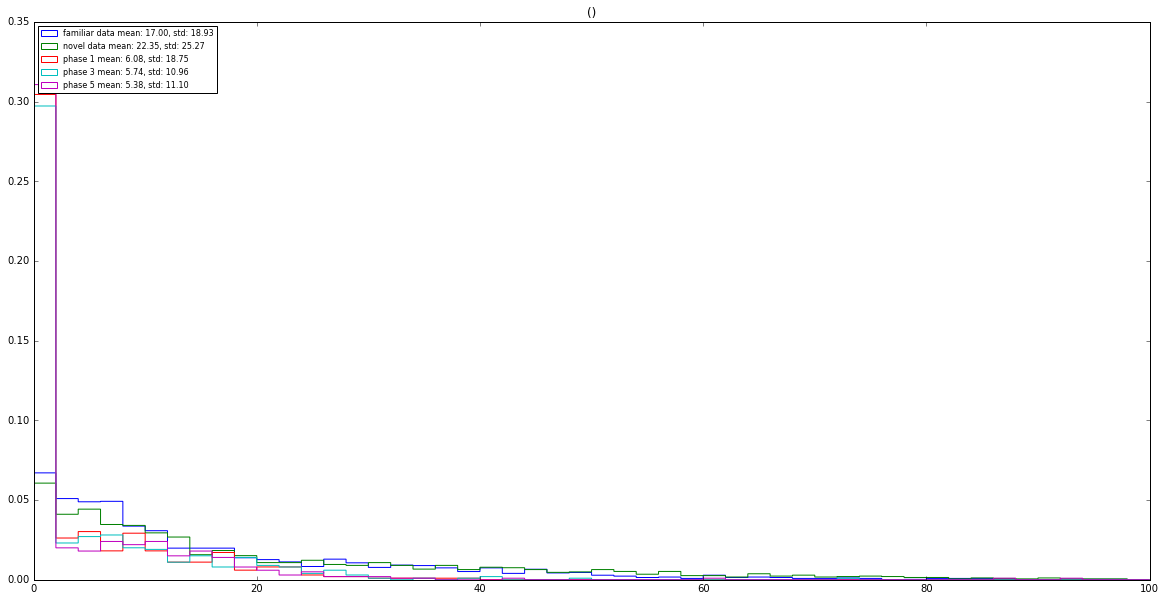

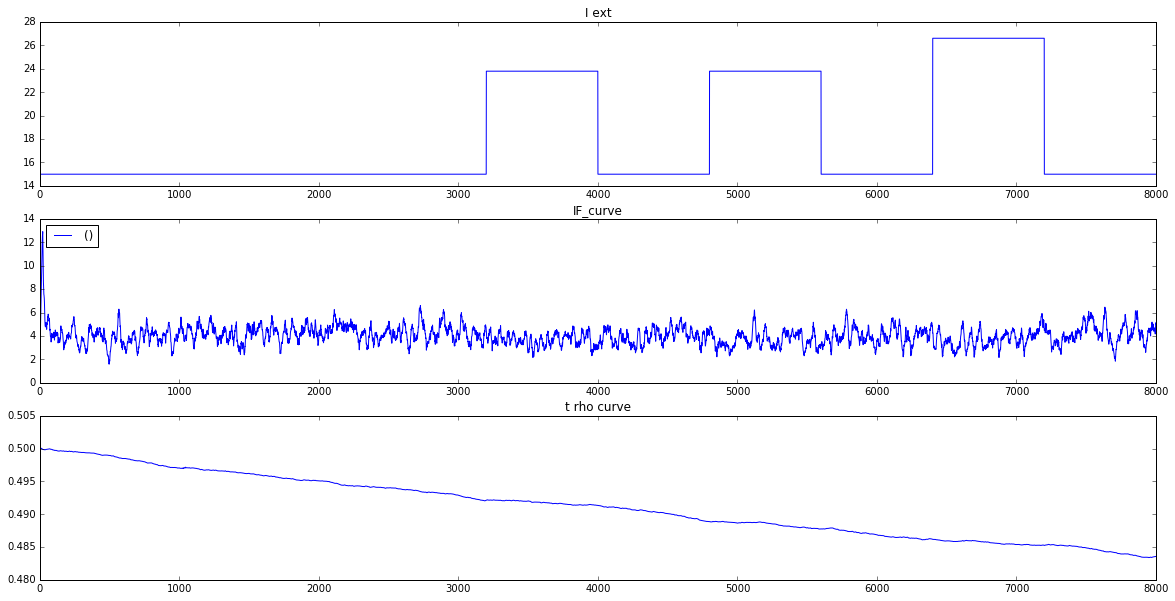

In [7]:
# additively applied to params
param_diffs = {
    'cpre_0':0,
    'cpost_0':0,
    'rho_0':0,
    'c':0,
    'dummy':0,
    'Ipre':0,
    'Ipost':0,
    'w0':0,
    'w_EE':0,
    'w_IE':0,
    'w_II':0,
    'w_EI':0,
    #LIF specific constants,
    'tau_lif':0, #*ms
    'V_init':0,
    'V_rest':0,
    'V_reset':0,
    'V_threshold':0,
    'CM':0,
    'RM':0,
    'refrac':0,
    #Synapse model specific constants,
    'rho_init':0,
    'ca_initial':0,
    'ca_delay':0, #ms
    'Cpre':0,
    'Cpost':0,
    'eta':0,
    'tau_ca':0,
    'theta_D':0,
    'theta_P':0,
    'gamma_D':0,
    'gamma_P':0,
    'taurho':0, #*ms
    'taurho_fast':0, #*ms # dummy,
    'taupre':0,
    'taupost':0,
    'tau_ca':0, #*ms
    'rho_star':0,
    'D':0,
    'baseline_I_ext_E':0,
    'baseline_I_ext_I':0,

    #'mean_I_ext_E':0,
    #'mean_I_ext_I':0,
    #'sigma': 0,
    #'familiar_individual_sigma':0}

    'mean_I_ext_E':0,
    'mean_I_ext_I':0,
    'sigma':0,
    'familiar_individual_sigma':0}
    


# Control variables
simulation_length =8000
stair_length = 500
N_E = 500
N_I = 120
sample = 10
debug = False

sim = Brian_Simulator(simulation_length=simulation_length, stair_length=stair_length,N_E=N_E,N_I=N_I,sample=sample,
         params=params, debug=debug)


#12 with all excitatory, 15 with E:I=4:1 

# input pattern candidates

#input_flag = 'stair'
#input_flag = 'stable'
#input_flag = 'stable_with_bias'
#input_flag = '4_phase'
#input_flag = '4_phase_with_bias'
input_flag = '_fam_fam_nov_'
if input_flag == 'stair':
    resets = simulation_length / stair_length
else:
    resets = 1


# result variables
spike_dict = build_multivar_spike_dict(param_diffs) # store spike trains for each parameter set
spike_dict = build_real_value_spike_dict(params,param_diffs) # store spike trains for each parameter set

param_trial_num = len(spike_dict)

binned_rate_E = np.zeros((simulation_length * 10, param_trial_num))
binned_rate_I = np.zeros((simulation_length * 10, param_trial_num))
rho = np.zeros((N_E, simulation_length, param_trial_num))
mean_rate_shift =np.zeros((param_trial_num,1))
#print spike_dict

if param_trial_num == -1:
    mode = 'cpp_standalone'
else:
    mode = 'cython'


t = arange(simulation_length)

#for i in arange(param_trial_num):
for ind, key in enumerate(spike_dict):
    cpp_directory = 'output_'+str(ind)

    (I_ext_E, I_ext_I, binned_rate_E[:,ind], binned_rate_I[:,ind], rho[:,:,ind], spike_dict[key]) = sim.run(key, mode=mode, input_flag=input_flag, resets=resets, cpp_directory=cpp_directory)
    #call(['rm','-r',cpp_directory])


# analysis

if input_flag == '4_phase_with_bias':
    analyse_all_parameter_sets(t, I_ext_E, spike_dict,real_data) 
    #for key in spike_dict:
    #    print "Key:",key
    #    analyse_spikes_phasewise(t, I_ext_E,key, spike_dict[key], real_data)
elif input_flag == '_fam_fam_nov_':
    #ref_data = sio.loadmat('data/nov_stim_rates.mat')
    #raw_data = sio.loadmat('data/Data_Sheinberg_Neuron2012_FiringRates.mat')
    (R_fam_E, R_fam_I, R_nov_E, R_nov_I) = unpack_raw_data('data/Data_Sheinberg_Neuron2012_FiringRates.mat')

    #real_data = ref_data['rnov']
    #lognormal_fit(real_data)
    analyse_all_parameter_sets(t, I_ext_E, spike_dict,R_fam_E,R_nov_E, params) 
    #analyse_all_parameter_sets(t, I_ext_I, spike_dict,real_data, params) 
    #for key in spike_dict:
        #print "Key:",key
        #analyse_spikes_phasewise(t, I_ext_E,key, spike_dict[key], real_data)

else:
    for key in spike_dict:
        #analyse_spikes_phasewise(t, I_ext_E,val)
        analyse_spikes(key, spike_dict[key])

#snapshot = simulation_length / 4 + 1
#visualize_I_ext(I_ext_E[snapshot,:])
visualize_all(I_ext_E, binned_rate_E, rho, t, resets, spike_dict.keys(), input_flag)
show()


$$c = \sqrt{a^2 + b^2}$$